# Group 1

Fabio Ceruti- Fabio Martino - Alex Lucchini - Jacopo Biggiogera

This notebook contains the code that we used to do the train, validation and test splits.
The data was then saved in diffferent dataframes and they were used to run every single model.

In [7]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#Full data
animals = pd.read_csv('12paths_df.csv')
animals.head()

,path,label
0,Animals/Sciurus carolinensis/2d82dcf6c764bca46...,9
1,Animals/Sciurus carolinensis/3286790a153b1464b...,9
2,Animals/Sciurus carolinensis/c3075d381e62d4fce...,9
3,Animals/Sciurus carolinensis/219d19b874f616140...,9
4,Animals/Sciurus carolinensis/c7b13665c78afcd4b...,9


In [25]:
to_remove = []
for i in animals['path']:
    if i.split('/')[-1]=='.ipynb_checkpoints':
        to_remove.append(i)

In [24]:
#pictures that were corrupted
wrong = pd.read_csv('wrong_tot.csv')
wrong.head()

,with_mistake
0,Animals/Sciurus carolinensis/d69a8488f833ed09a...
1,Animals/Sciurus carolinensis/1fa8bde9208e5e382...
2,Animals/Sciurus carolinensis/6cfac7875adf5e0ee...
3,Animals/Sciurus carolinensis/bb0c67766c8a07d82...
4,Animals/Sciurus carolinensis/8d2c7a13b6a452818...


In [26]:
#removing the wrong paths
animals = animals[~animals['path'].isin(to_remove)]
animals_clean = animals[~animals['path'].isin(list(wrong['with_mistake']))]
print(animals_clean.shape)
animals_clean.head()

(17088, 2)


,path,label
0,Animals/Sciurus carolinensis/2d82dcf6c764bca46...,9
1,Animals/Sciurus carolinensis/3286790a153b1464b...,9
2,Animals/Sciurus carolinensis/c3075d381e62d4fce...,9
3,Animals/Sciurus carolinensis/219d19b874f616140...,9
4,Animals/Sciurus carolinensis/c7b13665c78afcd4b...,9


In [52]:
#Splitting into train+val and test
np.random.seed(4) #for reproducibility
X_train, X_val, y_train, y_val = train_test_split(animals_clean['path'],animals_clean['label'], test_size=0.15, stratify=animals_clean['label'])
train_val_data = pd.DataFrame({'path':X_train, 'label':y_train}).reset_index(drop=True)
test_data = pd.DataFrame({'path':X_val, 'label':y_val}).reset_index(drop=True)

In [53]:
#Saving data
train_val_data.to_csv('train_val_data.csv', index = False)
test_data.to_csv('test_data.csv', index = False)

In [4]:
test = pd.read_csv('test_data.csv')
old_test = pd.read_csv('old_test_data.csv')

In [3]:
import matplotlib.patches as mpatches
families = {'Sciurus carolinensis':'Mammal', 'Trachemys scripta elegans':'Reptile', 'Junonia coenia': 'Insect', 'Pandion haliaetus':'Bird', 'Pachydiplax longipennis':'Insect', 'Anolis carolinensis':'Reptile', 'Chelydra serpentina':'Reptile', 'Spinus tristis':'Bird', 'Procyon lotor':'Mammal', 'Harmonia axyridis':'Insect', 'Picoides pubescens':'Bird', 'Canis latrans':'Mammal'}
colors = {'Sciurus carolinensis':'y', 'Trachemys scripta elegans':'purple', 'Junonia coenia': 'brown', 'Pandion haliaetus':'orange', 'Pachydiplax longipennis':'brown', 'Anolis carolinensis':'purple', 'Chelydra serpentina':'purple', 'Spinus tristis':'orange', 'Procyon lotor':'y', 'Harmonia axyridis':'brown', 'Picoides pubescens':'orange', 'Canis latrans':'y'}
mammal_patch = mpatches.Patch(color='y', label='Mammal')
reptile_patch = mpatches.Patch(color='purple', label='Reptile')
insect_patch = mpatches.Patch(color='brown', label='Insect')
bird_patch = mpatches.Patch(color='orange', label='Bird')
handles = [mammal_patch, reptile_patch, insect_patch, bird_patch]

In [27]:
old_test['species'] = [i.split('/')[1] for i in old_test['path']]
old_group_test = old_test.groupby('species').count()['path']
old_group_test = old_group_test.reset_index()
old_group_test['family'] = [families[i] for i in old_group_test['species']]
old_group_test['color'] = [colors[i] for i in old_group_test['species']]
old_group_test = old_group_test.sort_values('color')

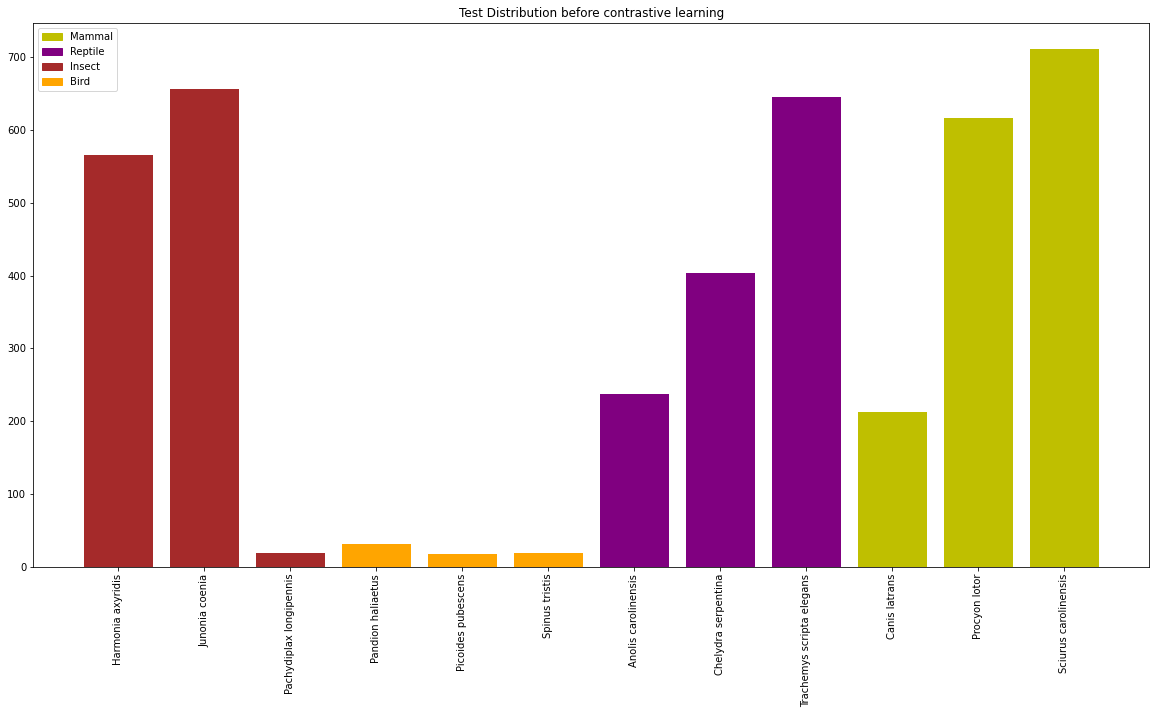

In [35]:
plt.figure(figsize = (20,10))
plt.bar(old_group_test['species'],old_group_test['path'], color = old_group_test['color'])
plt.tick_params(axis = 'x',rotation = 90)
plt.title('Test Distribution before contrastive learning')
plt.legend(handles = handles)
plt.show()

In [33]:
test['species'] = [i.split('/')[1] for i in test['path']]
group_test = test.groupby('species').count()['path']
group_test = group.reset_index()
group_test['family'] = [families[i] for i in group_test['species']]
group_test['color'] = [colors[i] for i in group_test['species']]
group_test = group_test.sort_values('color')

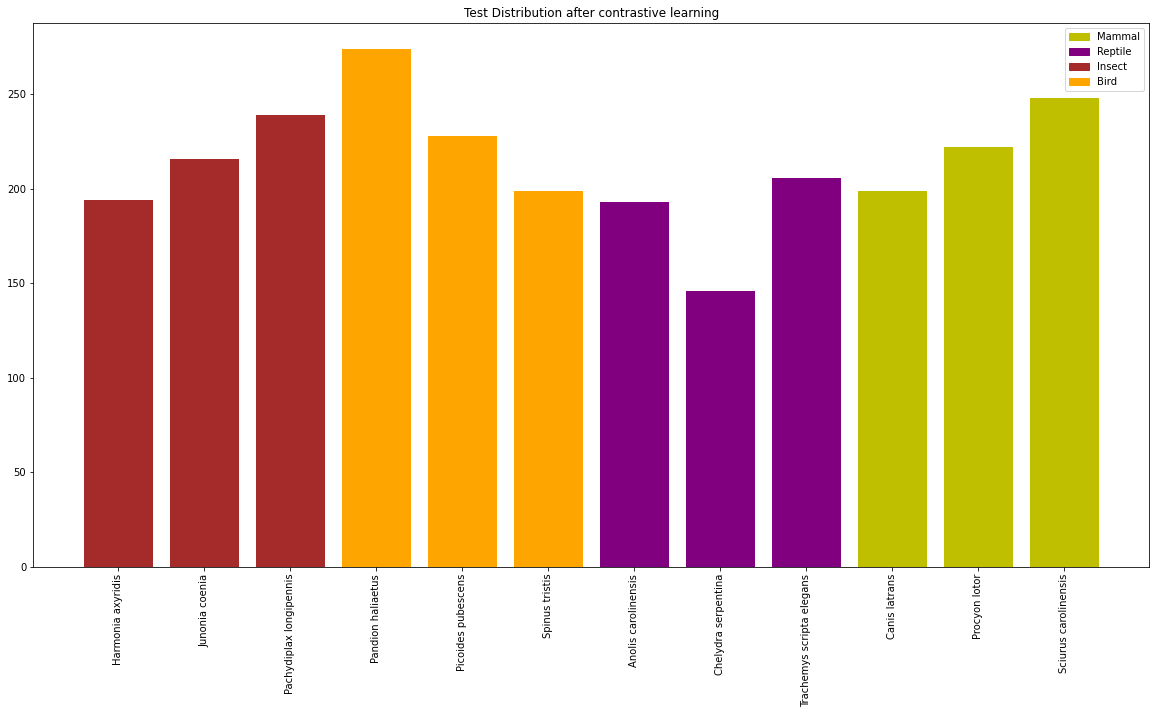

In [31]:
plt.figure(figsize = (20,10))
plt.bar(group_test['species'],group_test['path'], color = group_test['color'])
plt.tick_params(axis = 'x',rotation = 90)
plt.title('Test Distribution after contrastive learning')
plt.legend(handles = handles)
plt.show()

We can see that contrastive learning has been succesful in allowing us to generate a class balanced test set